In [2]:

import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [ ]:
# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('Whitegird')
%matplotlib inline

In [7]:
#importing to read stock data from web
from pandas_datareader import DataReader

In [8]:
#timestamps
from datetime import datetime

In [9]:
#tech stock lists
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [10]:
#time period for the analysis
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [13]:
#for grabbing yahoo finance data
for stock in tech_list:
    #setting datafrmae name 
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [14]:
#summary stats of Apple 
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,221.576324,217.892767,219.509723,219.945613,2.776777e+07,218.872049
std,40.450406,40.071015,40.170771,40.467772,9.889098e+06,41.112869
min,158.130005,154.110001,156.250000,154.679993,1.136200e+07,152.390320
25%,194.960007,190.779999,191.660004,192.740005,2.099050e+07,191.435730
50%,207.419998,203.839996,205.789993,205.699997,2.588620e+07,204.968811
75%,246.729996,241.809998,244.759995,243.580002,3.201100e+07,242.850891
max,327.850006,321.380005,324.450012,324.339996,6.928140e+07,324.339996


In [15]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-01-29 to 2020-01-29
Data columns (total 6 columns):
High         253 non-null float64
Low          253 non-null float64
Open         253 non-null float64
Close        253 non-null float64
Volume       253 non-null float64
Adj Close    253 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


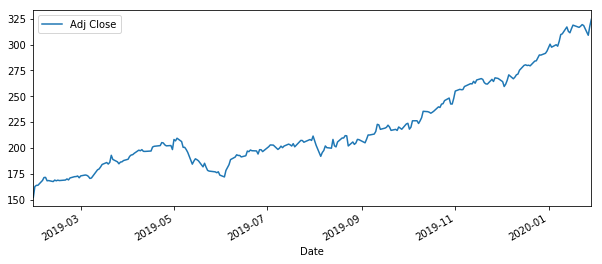

In [17]:
# historical view of the closing price
AAPL['Adj Close'].plot(legend = True, figsize=(10,4))

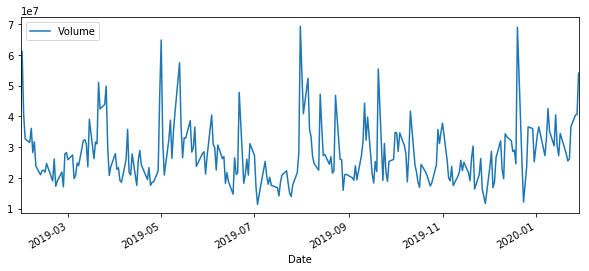

In [18]:
# total volume of stock being traded each day over the past 5 years
AAPL["Volume"].plot(legend = True, figsize=(10,4))

In [21]:
# several moving averages of Apple stocks
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]= AAPL['Adj Close'].rolling(ma).mean()

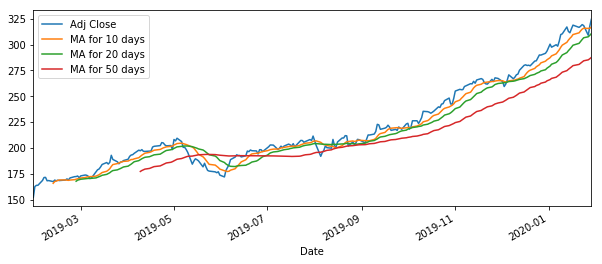

In [22]:
# plotiing moving averages
AAPL[['Adj Close','MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots = False, figsize=(10,4))

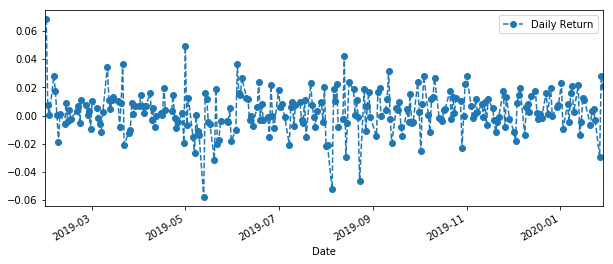

In [24]:
# Daily return analysis
#Analayzing risk of the stocks

AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize =(10,4),legend = True, linestyle ='--',marker ='o')

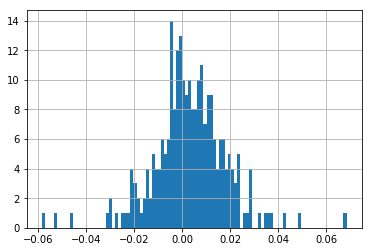

In [25]:
AAPL['Daily Return'].hist(bins = 100)

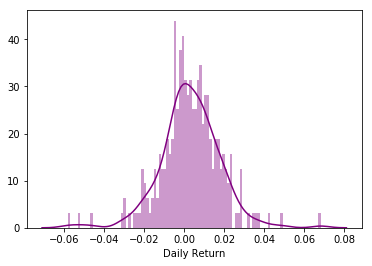

In [26]:
# Daily returns depicted using both histogram and KDE plot
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [28]:
# assigning closing prices of all stocks into a Dataframe
closing_df= DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [30]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-01-29,152.390320,1593.880005,1060.619995,101.440102
2019-01-30,162.803864,1670.430054,1089.060059,104.829979
2019-01-31,163.976242,1718.729980,1116.369995,102.908394
2019-02-01,164.055069,1626.229980,1110.750000,101.282433
2019-02-04,168.715042,1633.310059,1132.800049,104.199295


In [31]:
# Daily returns of all the stocks
tech_rets = closing_df.pct_change()

In [33]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-01-29,NaN,NaN,NaN,NaN
2019-01-30,0.068335,0.048027,0.026815,0.033418
2019-01-31,0.007201,0.028915,0.025077,-0.018330
2019-02-01,0.000481,-0.053819,-0.005034,-0.015800
2019-02-04,0.028405,0.004354,0.019851,0.028799


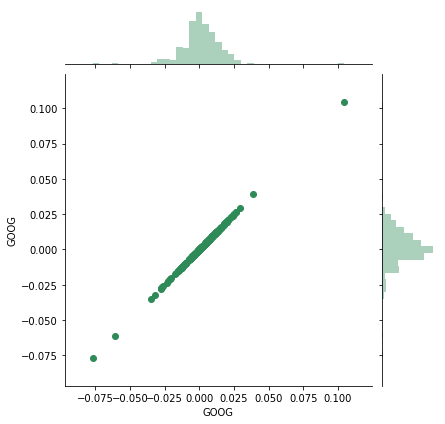

In [34]:
# checking the correlation between same stock
sns.jointplot('GOOG', 'GOOG', tech_rets, kind = 'scatter', color = 'seagreen')

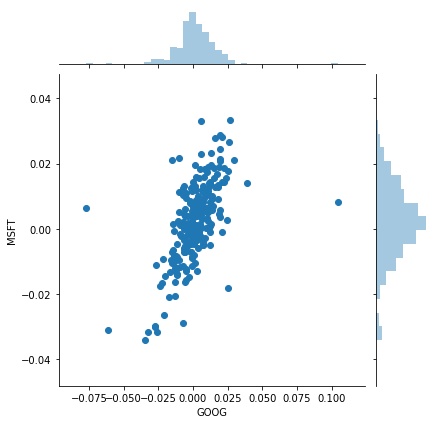

In [45]:
#checking the correlation between different stocks
sns.jointplot('GOOG', 'MSFT', tech_rets, kind = 'scatter')

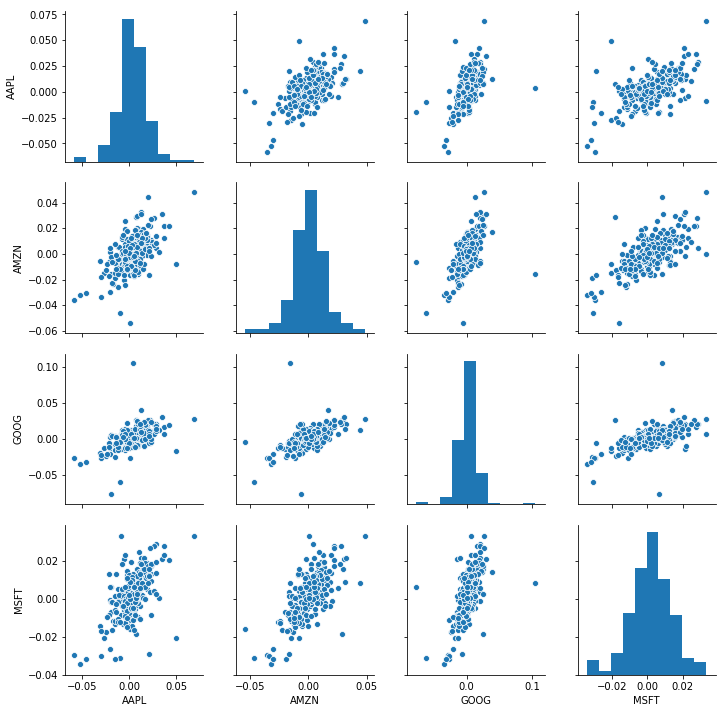

In [46]:
# visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

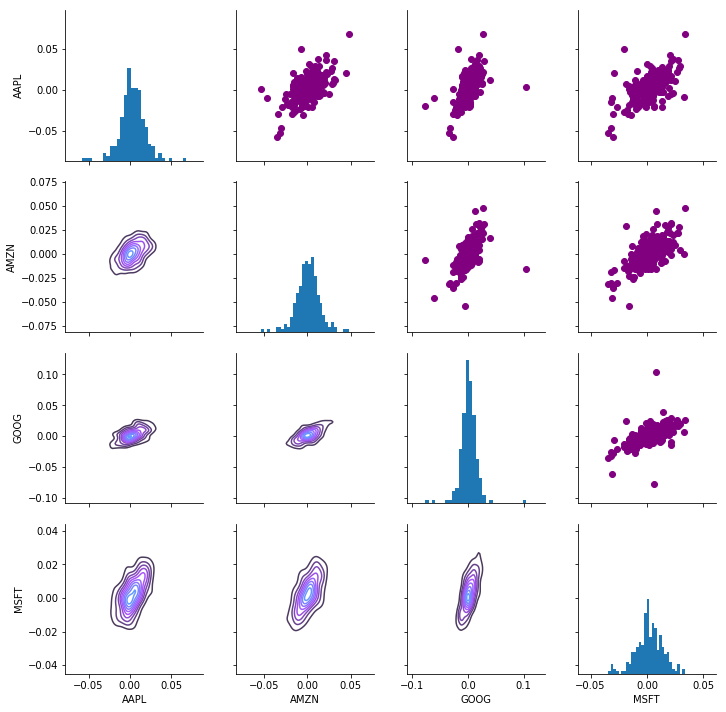

In [51]:
# Using PairGrid to customize upper triangle , lower triangle  and diagnol part of the diagram
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color ='purple')
returns_fig.map_lower(sns.kdeplot, cmap ='cool_d')
returns_fig.map_diag(plt.hist, bins = 30)

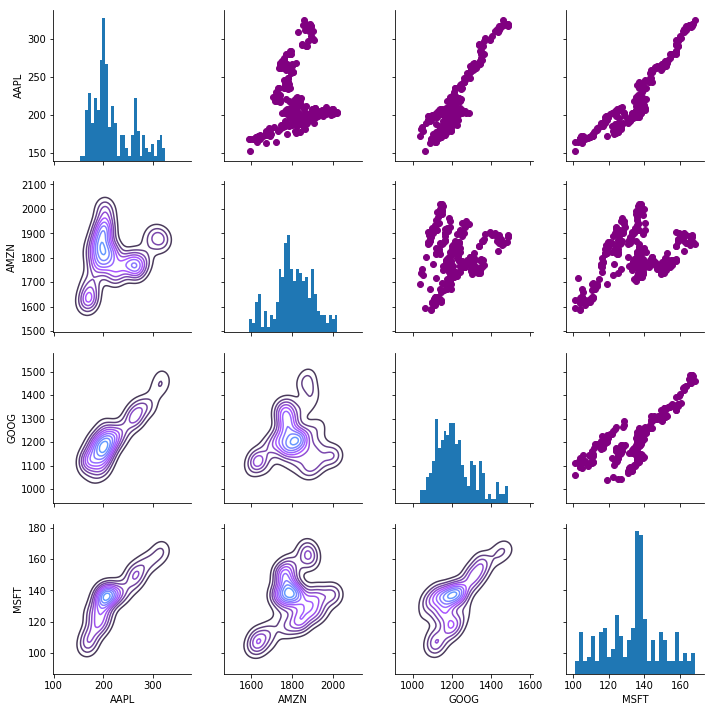

In [53]:
# Analyzing closing prices
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter, color ='purple')
returns_fig.map_lower(sns.kdeplot, cmap ='cool_d')
returns_fig.map_diag(plt.hist, bins = 30)

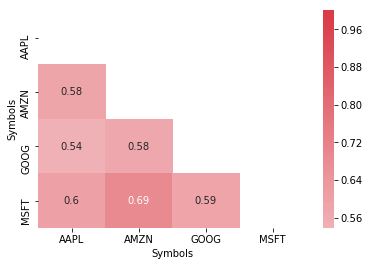

In [66]:
# Correlation among daily returns
corr = tech_rets.dropna().corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True

cmap = sns.diverging_palette(256, 10, sep=80,n=7, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, annot = True,  center=0,
           )

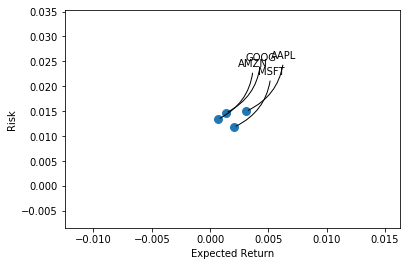

In [69]:
#Risk Analysis
#removing NaN 
rets = tech_rets.dropna()

area = np.pi*20
plt.scatter(rets.mean(),rets.std(),s = area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

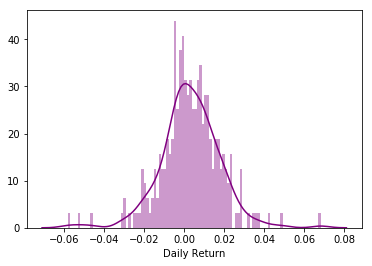

In [71]:
#Bootstrap method for Value at risk
# Plotting daily retuns 


sns.distplot(AAPL['Daily Return'].dropna(), bins =100, color = 'purple')

In [72]:
# Using quantile to get the risk value for the stock
# Confidance levle of 95%, worst daily loss would not exceed 2%
rets['AAPL'].quantile(0.05)

-0.020535694375501234

In [73]:
#Value at Risk using the Monte Carlo method
# Setting up time horizon
days = 365

#Delta
dt = 1/days
#mu (drift) from the expected return data

mu = rets.mean()['GOOG']
#the volatility of the stock from the std() of the average return

sigma = rets.std()['GOOG']

In [80]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    #Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price  

In [76]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-29,1075.150024,1055.864990,1072.680054,1060.619995,1021800,1060.619995
2019-01-30,1091.000000,1066.849976,1068.430054,1089.060059,1279800,1089.060059
2019-01-31,1117.329956,1095.410034,1103.000000,1116.369995,1538300,1116.369995
2019-02-01,1125.000000,1104.890015,1112.400024,1110.750000,1462200,1110.750000
2019-02-04,1132.800049,1109.020020,1112.660034,1132.800049,2576500,1132.800049


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

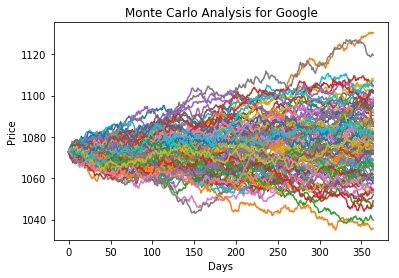

In [81]:
start_price = 1072.68

for x in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [83]:
#using a much larger run
runs = 10000

# Empty matrix to hold the end price data
simulations = np.zeros(runs)

# only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

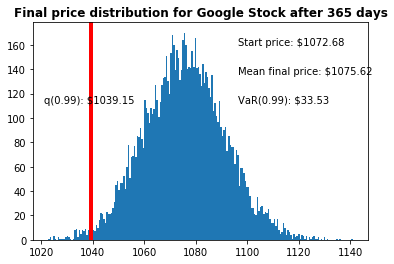

In [84]:
# Plotting histogram and using quantiles to define risk for this stock

# Using confidence level 99%

q = np.percentile(simulations, 1)
# Plotting distribution of end prices
plt.hist(simulations, bins = 200)

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');